# Integrantes:
- Jorge Eduardo Rodriguez Cardozo - 200711501
- German Augusto Carvajal Murcia -  201313516

# Exercise 04

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [4]:
import zipfile
with zipfile.ZipFile('/Users/germancarvajal/Dropbox/Universidad-201818/Deep_learning_y_redes_neuronales/AppliedDeepLearningClass/datasets/fraud_detection.csv.zip', 'r') as z:
    f = z.open('15_fraud_detection.csv')
    data = pd.io.parsers.read_table(f, index_col=0, sep=',')

In [5]:
data.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [6]:
data.shape, data.Label.sum(), data.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [7]:
X = data.drop(['Label'], axis=1)
y = data['Label']

# Exercice 04.1

Estimate a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [8]:
import random
random.seed(123)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_class=logreg.predict(X_test)
from sklearn import metrics
print('Acuracy: '+ str(metrics.accuracy_score(y_test, y_pred_class)))
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision_score ', precision_score(y_test, y_pred_class))
print('recall_score    ', recall_score(y_test, y_pred_class))
print('f1_score    ', f1_score(y_test, y_pred_class))

Acuracy: 0.993973645512
precision_score  0.0
recall_score     0.0
f1_score     0.0


/Users/germancarvajal/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/germancarvajal/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


> Bad performance due to an unbalanced sample. There's no detection af the postitive class ant thus is not posible to cumpute the precesion or recall score, as well as the undetermined f1_score

# Exercice 04.2

Under-sample the negative class using random-under-sampling

Which parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [9]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

In [10]:
target_percentage = 0.5
X_u, y_u = UnderSampling(X_train, y_train, target_percentage, 123)
logreg_under = LogisticRegression()
logreg_under.fit(X_u,y_u)
y_pred_class=logreg_under.predict(X_test)
print('Acuracy: '+ str(metrics.accuracy_score(y_test, y_pred_class)))
print('precision_score ', precision_score(y_test, y_pred_class))
print('recall_score    ', recall_score(y_test, y_pred_class))
print('f1_score    ', f1_score(y_test, y_pred_class))

Acuracy: 0.491796660996
precision_score  0.00957422842983
recall_score     0.813397129187
f1_score     0.0189256888394


> The prediction improves due to the balancing of the sample. Now the algorithm can detect and predict the postive class, but with a high reate of false positive detections resulting in a low precision score compared to the over 80% recall score.

> The F1 score is computed with a value of just 0.018 then making it too low for the model to be used as a prediction mechanism

# Exercice 04.3

Now using random-over-sampling

In [12]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()
    
    n_samples_1_new =  target_percentage * n_samples_0 / (1-target_percentage)

    np.random.seed(seed)
    
    filter_ = np.random.choice(X[y == 1].index, int(n_samples_1_new))

    filter_ = np.hstack((filter_,X[y == 0].index))

    return X.loc[filter_], y.loc[filter_]

In [13]:
target_percentage = 0.5
X_o, y_o = OverSampling(X_train, y_train, target_percentage, 123)
logreg_over = LogisticRegression()
logreg_over.fit(X_o,y_o)
y_pred_class=logreg_over.predict(X_test)
print('Acuracy: '+ str(metrics.accuracy_score(y_test, y_pred_class)))
print('precision_score ', precision_score(y_test, y_pred_class))
print('recall_score    ', recall_score(y_test, y_pred_class))
print('f1_score    ', f1_score(y_test, y_pred_class))

Acuracy: 0.530953548052
precision_score  0.00970933072789
recall_score     0.760765550239
f1_score     0.0191739523666


> The results of the over sampling present a small improvement in the precision potentialy due to the fact of having more positve class individuals to learn the patter. Yet the recall score is lower, meaning that the improvement in the precision is completely attributable to a reduction of prediction of positive classes registries.

> The F1 score is slightly superior but still too low to use the model as a reliable classification mechanism

# Exercice 04.4*
Evaluate the results using SMOTE

Which parameters did you choose?

In [12]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()
    
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X.shape[1]))

    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
   
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1].iloc[sel] - step * (X[y==1].iloc[sel] - X[y==1].iloc[nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

In [13]:
target_percentage = 0.5
X_s,y_s=SMOTE(X_train, y_train, target_percentage, 5, 123)
logreg_smote = LogisticRegression()
logreg_smote.fit(X_s,y_s)
y_pred_class=logreg_smote.predict(X_test)
print('Acuracy: '+ str(metrics.accuracy_score(y_test, y_pred_class)))
print('precision_score ', precision_score(y_test, y_pred_class))
print('recall_score    ', recall_score(y_test, y_pred_class))
print('f1_score    ', f1_score(y_test, y_pred_class))

Acuracy: 0.70981228915
precision_score  0.0073977806658
recall_score     0.354066985646
f1_score     0.0144927536232


> Even thought SMOTE should have included a far grater amount of information into the database variability, the performance of the trained algorithm is worse that that of the under sampled and over sampled trials. In the particular, the model has a clear biased toward predicting false positive individuals then reducing significally the precision score. At the same time, the recall score takes a hit on the performance side due to the low detection capacity of true positives within the sample.

> The F1 score is lower than the models trained with over and under sampling. Adding to the fact the method requires havey computational time, the performance result render useless the use of SMOTE to fight the unbalancing of the classes.

# Exercice 04.5

Estimate a Logistic Regression, GaussianNB, K-nearest neighbors and a Decision Tree **Classifiers**

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

Combine the classifiers and comment

** - The models are trained with the over-sampled database because is was the input for the best performance logistic regression model evaluated **

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = {'lr': LogisticRegression(),
          'dt': DecisionTreeClassifier(),
          'nb': GaussianNB(),
          'nn': KNeighborsClassifier()}

for model in models.keys():
    models[model].fit(X_o, y_o)

In [15]:
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [17]:
from sklearn.metrics import fbeta_score
for model in models.keys():
    print(model)
    print('Acuracy: '+ str(metrics.accuracy_score(y_test, y_pred[model])))
    print('f1_score    ', f1_score(y_test, y_pred[model]))
    print('F_beta_score    ', fbeta_score(y_test, y_pred[model],beta=10))

lr
Acuracy: 0.530953548052
f1_score     0.0191739523666
F_beta_score     0.430813391995
dt
Acuracy: 0.989706179176
f1_score     0.118518518519
F_beta_score     0.114903299204
nb
Acuracy: 0.222311928722
f1_score     0.0140376530799
F_beta_score     0.403613204013
nn
Acuracy: 0.98082523572
f1_score     0.104979811575
F_beta_score     0.183773444061


** - The assembly method is the hard voting majority **

In [40]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[('lr', models['lr']), ('dt', models['dt']), ('nb', models['nb']),('nn',models['nn'])], voting='hard')
ensemble.fit(X_o,y_o)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('dt', Decisio...owski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [49]:
y_pred_vot=ensemble.predict(X_test)

In [50]:
print('Acuracy: '+ str(metrics.accuracy_score(y_test, y_pred_vot)))
print('f1_score    ', f1_score(y_test, y_pred_vot))
print('F_beta_score    ', fbeta_score(y_test, y_pred_vot,beta=10))

Acuracy: 0.982641792336
f1_score     0.117302052786
F_beta_score     0.189023534366


> Each of the classifiers trained exhibits a low performance in terms of the F1 score, even in those which have a high accuracy due to the biased towards predicting false positives within the sample. The ensamble model suffers the same problem with an acuracy of over 98% but a F1 score of just 0.11.

> Thought the combined model has a higher F1 and F_beta score over the two worst performers, the aggregate classfication performance is still worse than the best model (The decission tree classifier).

# Exercice 04.6

Using the under-sampled dataset

Evaluate a RandomForestClassifier and compare the results

change n_estimators=100, what happened

In [ ]:
from sklearn.ensemble import RandomForestClassifier
AUC = []
estimator_range=range(10,160,10)
rfreg = RandomForestClassifier()
for estimator in estimator_range:
    rfclass = RandomForestClassifier(n_estimators=estimator, random_state=123, n_jobs=-1)
    rfclass.fit(X_u,y_u)
    AUC.append(metrics.roc_auc_score(y_test, rfclass.predict_proba(X_test)[:,1]))

Training multiple random forest classfiers with different number of individual trees results in the following graph where the y-axis corresponds to the computed area-under-ROC curve. Using this rough approximation is possible to observe the effects of an invresing number of individual classifiers over the total prediction power of the model.

Text(0,0.5,'AUC (Higher is better)')

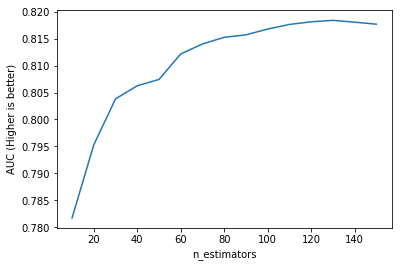

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(estimator_range, AUC)
plt.xlabel('n_estimators')
plt.ylabel('AUC (Higher is better)')

Taking a risk it is even possible to assure that the "optimum" number of trees is o is close to 130 classification trees grown within the random forest.

In [75]:
estimator_range[AUC.index(max(AUC))]

130

Training the random forest with 10 individual trees to begin, leads to a poor prediction power model with a strong bias towards false positive detection. Yet the total recall is acceptable, identifying correctly 63% of the real positives in the sample.

In [80]:
print('10 trees')
rfclass = RandomForestClassifier(n_estimators=10, random_state=123, n_jobs=-1)
rfclass.fit(X_u,y_u)
print('Acuracy: '+ str(metrics.accuracy_score(y_test, rfclass.predict(X_test))))
print('precision_score ', precision_score(y_test, rfclass.predict(X_test)))
print('recall_score    ', recall_score(y_test, rfclass.predict(X_test)))
print('f1_score    ', f1_score(y_test, rfclass.predict(X_test)))
print('F_beta_score    ', fbeta_score(y_test, rfclass.predict(X_test),beta=10))

10 trees
Acuracy: 0.778783772094
precision_score  0.01720791823
recall_score     0.636363636364
f1_score     0.0335097001764
F_beta_score     0.469209542771


By increasing the number of trees to a 100 there is a small increase in the recall now with an approximate value of 69%, even when all the other computed performance metric remain unchanged by the increase in the model size.

In [81]:
print('100 trees')
rfclass = RandomForestClassifier(n_estimators=100, random_state=123, n_jobs=-1)
rfclass.fit(X_u,y_u)
print('Acuracy: '+ str(metrics.accuracy_score(y_test, rfclass.predict(X_test))))
print('precision_score ', precision_score(y_test, rfclass.predict(X_test)))
print('recall_score    ', recall_score(y_test, rfclass.predict(X_test)))
print('f1_score    ', f1_score(y_test, rfclass.predict(X_test)))
print('F_beta_score    ', fbeta_score(y_test, rfclass.predict(X_test),beta=10))

100 trees
Acuracy: 0.76301144719
precision_score  0.0173535791757
recall_score     0.688995215311
f1_score     0.0338544727871
F_beta_score     0.498116309336
